## Quantitative Exercise
#### Filippo Pedrazzini, David Tomic

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"]

dataset = pd.read_csv('./dataset_kdd/train_20.csv', delimiter=','
                      ,header=None, names=col_names, index_col=False)
dataset.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


The objective of our project is to identify if a certain packet (given the features) is a normal packet or an attack. In this case the independent variables are all the features apart from the last one (labels). The feature labels specifies if a packet is normal or an attack (DOS, U2R, R2L, Probe). In order to focus on the main objective of the classification task we decided to face the problem as a binary classification task, transforming all the "not normal" labels into "attack".

In [2]:
target = dataset['labels'].copy()
target[target != 'normal'] = 'attack'
le = preprocessing.LabelEncoder()
le.fit(target)
binary_target = le.transform(target)
y = binary_target
dataset['labels_binary'] = y
dataset = dataset.drop('labels', 1)
dataset.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


## Tableau Visualization
After exporting the data frame into an excel file, we visualized the data using Tableau. The main objective of the visualization was to analyze the categorical variables and see if they were meaningful for the training. From the graphs, it is easy to understand that also the categorical variables can bring added value to the training due to the fact that the distribution of each label is different.

In [3]:
# transofrming the processed dataset and creating the excel file
# dataset.to_excel('train.xlsx')

<table><tr><td><img src='protocol.png'></td><td><img src='flag.png'></td></tr></table>
<table><tr><td><img src='service.png'></td>

## Statistics
Using describe method from pandas we can have all the most important statistics for each feature.

In [4]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels_binary
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,0.533860
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,0.498862
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Statistical Test
To confirm our hypothesis, we used the function SelectKBest() from Scikitlearn that takes two parameters: score_func (Default - ANOVA F-value between label/feature for classification tasks) and k (Number of top features to select, where k=“all” bypasses selection, useful for a parameter search). This function measures the correlation between each feature and the dependent variable.

In [5]:
def featuresel(x,y,data):
    selection = SelectKBest(k='all').fit(x,y)
    features = data
    d = {'Feature': features , 'weight': selection.scores_}
    df = pd.DataFrame(data=d)
    df = df.sort_values(by='weight', ascending=0)
    print(df)
    return

target = 'labels_binary'
dataset = pd.get_dummies(dataset)
variables = dataset.columns[dataset.columns!=target]
X = dataset[variables]
y = dataset[target]

featuresel(X,y,variables)

dataset = X
dataset['labels_binary'] = y

                      Feature        weight
116                   flag_SF  33753.436873
25              same_srv_rate  32237.024062
29         dst_host_srv_count  27004.333298
30     dst_host_same_srv_rate  23173.920914
8                   logged_in  22650.570410
35   dst_host_srv_serror_rate  18802.401243
34       dst_host_serror_rate  18532.466311
112                   flag_S0  18451.328420
21                serror_rate  18424.350029
22            srv_serror_rate  18216.144683
19                      count  12689.565759
63               service_http  11663.316573
87            service_private   6293.077919
28             dst_host_count   3966.245091
52           service_domain_u   1823.782538
37   dst_host_srv_rerror_rate   1781.421065
23                rerror_rate   1779.331257
36       dst_host_rerror_rate   1771.238708
24            srv_rerror_rate   1768.869029
31     dst_host_diff_srv_rate   1514.826009
40          protocol_type_udp   1289.191563
92               service_smtp   

Counting the number of normal/attack packets we can say that the dataset is balance and we don't need to rebalance it using resampling techniques.

In [6]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 13449, 0: 11743})


Other important things to visualize is the distribution of each feature and the correlation between them.

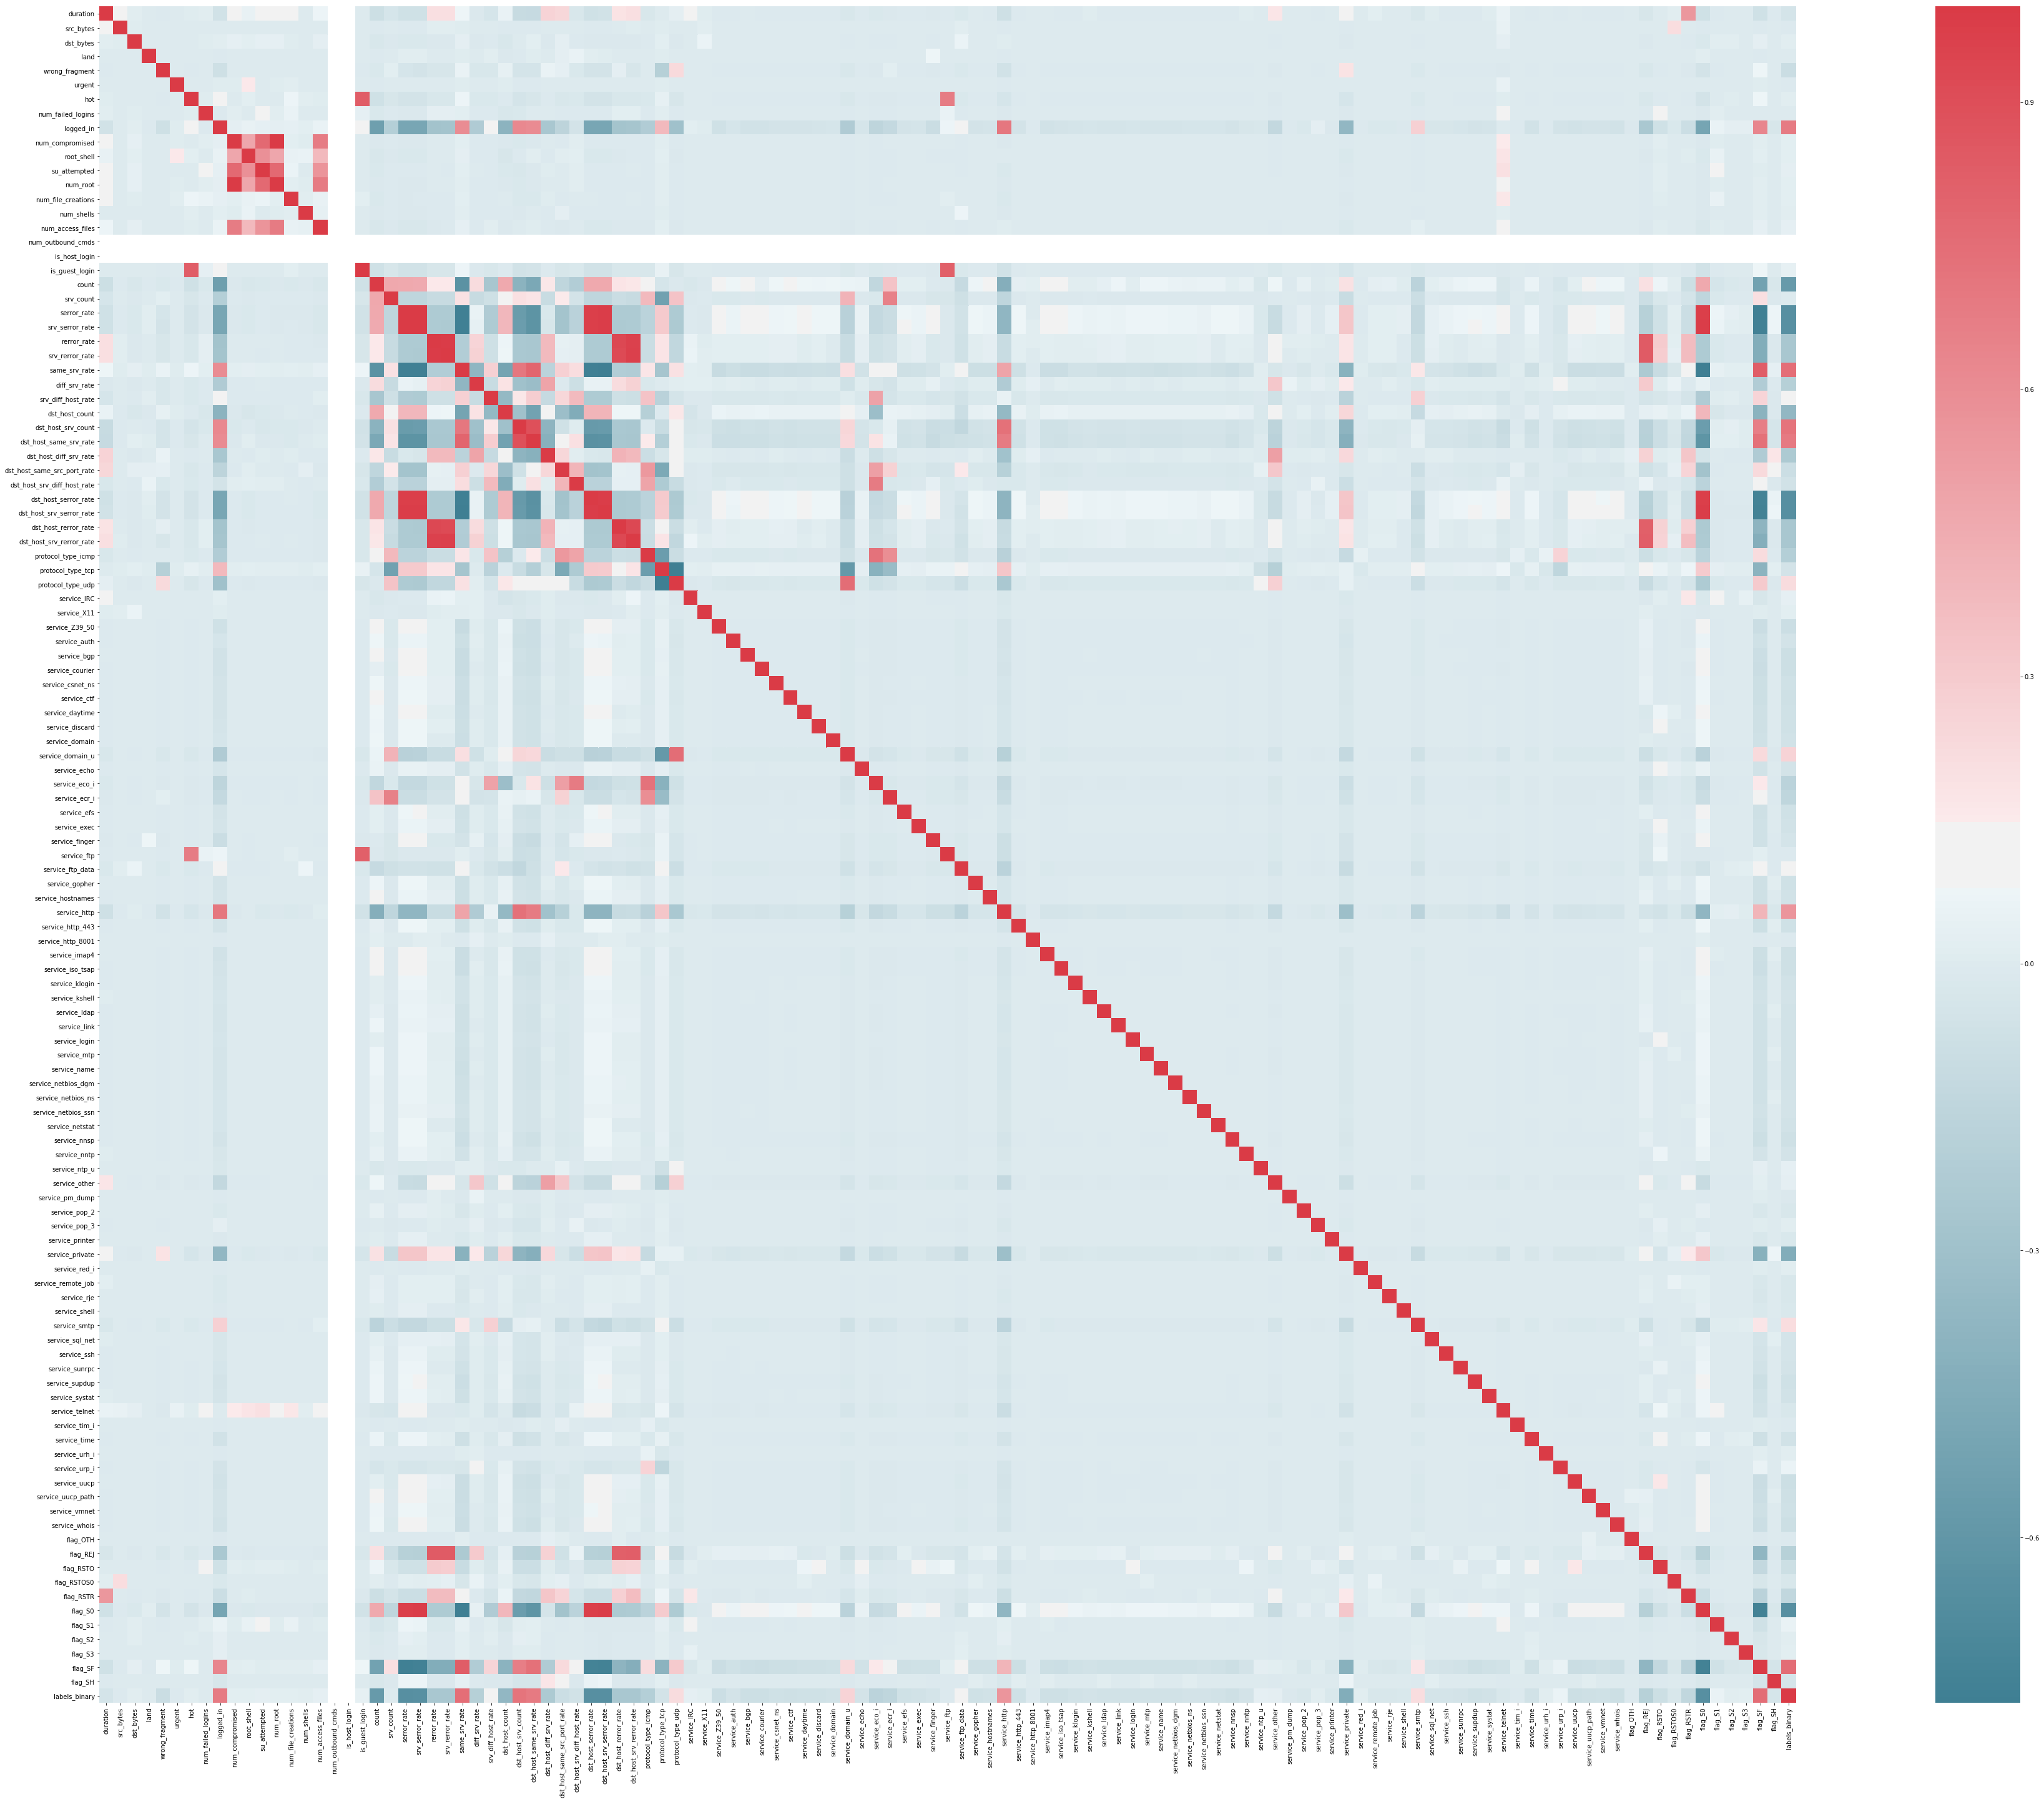

In [7]:
import seaborn as sns

f, ax = plt.subplots(figsize=(80, 50))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [8]:
#pd.options.display.mpl_style = 'default'
#dataset.hist()
#dataset.boxplot()

## Our Method
All these methods are useful to visualize data and do the first step of feature selection, deciding which features are more important in order to lower the complexity of the model keeping the same information. In our case these techniques are not so important, because we are facing a problem that many other researchers faced before and using both Machine Learning and Deep Learning techniques they proved the advantages of using Deep Learning. Our objective is to improve these deep learning techniques using more recent methods. Deep Learning methods don't require feature selection due to the fact that they extract the most important hidden features using the neurons. For this reason, we didn't focus our attention on the data visualization phase. 